# Data management with Scanpy

In [ ]:
#!pip install scanpy

In [17]:
import scanpy as sc
import anndata as ad
# Data retrieval
import pooch
import matplotlib.pyplot as plt
from matplotlib import rc_context

sc.set_figure_params(dpi=100, color_map="viridis_r")
sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=50, facecolor="white")
sc.logging.print_header()

Package,Version
ipykernel,6.29.5
debugpy,1.8.13
scanpy,1.11.1
anndata,0.11.4
matplotlib,3.10.1
pooch,1.8.2 (v1.8.2)
Component,Info
Python,"3.13.2 | packaged by conda-forge | (main, Feb 17 2025, 14:02:48) [Clang 18.1.8 ]"
OS,macOS-10.16-arm64-arm-64bit-Mach-O
CPU,"10 logical CPU cores, arm"


In [25]:
# Scarica il dataset PBMC 3k come esempio (sostituisci con il tuo dataset .h5ad)
adata = sc.datasets.pbmc3k()
adata   

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [26]:

# Filtra le cellule con meno di 500 geni espressi
sc.pp.filter_cells(adata, min_genes=500)
adata  


AnnData object with n_obs × n_vars = 2482 × 32738
    obs: 'n_genes'
    var: 'gene_ids'

In [27]:

# Filtra i geni espressi in meno di 3 cellule
sc.pp.filter_genes(adata, min_cells=3)
adata


AnnData object with n_obs × n_vars = 2482 × 13629
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [28]:

# Normalizza i dati alla profondità di sequenziamento
sc.pp.normalize_total(adata, target_sum=1e4)
adata


AnnData object with n_obs × n_vars = 2482 × 13629
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [29]:

# Applica la trasformazione logaritmica
sc.pp.log1p(adata)
adata
# Identifica i geni altamente variabili
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Seleziona solo i geni altamente variabili
adata = adata[:, adata.var.highly_variable]

# Scala i dati
sc.pp.scale(adata, max_value=10)

# Calcola la PCA
sc.tl.pca(adata, svd_solver='arpack')



/Users/cesaraugustoseminarioyrigoyen/miniconda3/envs/tesi_env/lib/python3.13/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


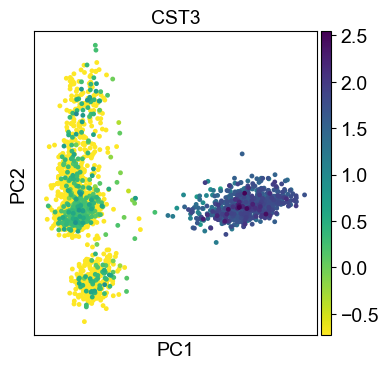

In [31]:
adata
# Plotta i risultati della PCA
sc.pl.pca(adata, color='CST3', save='_pca.png')